# Sprint 機械学習スクラッチ 線形回帰
<br>

#### 線形回帰スクラッチ
線形回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。<br>
<br>
以下に雛形を用意してあります。このScratchLinearRegressionクラスにコードを書き加えていってください。

In [98]:
import numpy as np
import matplotlib.pyplot as plt

In [307]:
# 雛形

class ScratchLinearRegression(): 
    """
    線形回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter=100, lr=0.1, no_bias=True, verbose=False):
        # ハイパーパラメータを属性として記録
        self.num_iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.num_iter)
        self.val_loss = np.zeros(self.num_iter)
        self.coef_ = None

        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データ

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形の仮定関数による推定結果
        """

        return np.dot(X, self.coef_.T)


    def _gradient_descent(self, X, y, h_array):
        """
        最急降下法によりパラメータの更新を行う

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データ
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        h_array : 次の形のndarray, shape (n_samples,)
            推定した値    
            
        Returns
        -------
        self.coef_ : 次の形のndarray, shape (n_features, 1)
            最急降下法により更新されたパラメータ
        """

        self.coef_ -= (self.lr/len(X)) * np.dot((h_array - y), X)

        return self.coef_


    def _cost_function(self, pred, y):
        """
        目的関数の計算

        Parameters
        ----------
        pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
          numpy.float
          平均二乗誤差
        """

        return np.sum((pred - y)**2) / (2*len(y))


    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """

        # bias無しの場合はX_0を追加せずパラメータを作成
        if self.no_bias:
            self.coef_ = np.random.rand(len(X[0]))
        # bias有りの場合はX_0 = 1をXにconcatし、パラメータを作成
        else:
            bias = np.ones(len(X)).reshape(-1, 1)
            X = np.concatenate((bias, X), axis=1)
            self.coef_ = np.random.rand(len(X[0]))

        # 検証データに対する学習の有無はX_valとy_valが提示された場合のみに指定
        # hasattr関数を使用し、X_val, y_valが__array__attributeを所持するかで判断
        if hasattr(X_val, '__array__') and hasattr(y_val, '__array__'):
            for i in range(self.num_iter):
                
                h_array = self._linear_hypothesis(X)
                pred = self.predict(X_val)
                
                self.coef_ = self._gradient_descent(X, y, h_array)

                self.loss[i] = self._cost_function(h_array, y)
                self.val_loss[i] = self._cost_function(pred, y_val)
        
        else:
            for i in range(self.num_iter):

                h_array = self._linear_hypothesis(X)
                
                self.coef_ = self._gradient_descent(X, y, h_array)

                self.loss[i] = self._cost_function(h_array, y)

        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(self.loss)

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        # bias無しの場合はX_0を追加せずpass
        if self.no_bias:
            pass
        # bias有りの場合はX_0 = 1をXにconcat
        else:
            bias = np.ones(len(X)).reshape(-1, 1)
            X = np.concatenate((bias, X), axis=1)        
        
        return np.dot(X, self.coef_.T)

## 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。<br>

$$
h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)\\
$$

特徴量の数$n$は任意の値に対応できる実装にしてください。<br>
<br>
なお、ベクトル形式で表すと以下のようになります。
$$
h_\theta(x) = \theta^T \cdot x.
$$

In [1]:
# 雛形
# クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています。

def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データ

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
    """

    return np.dot(X, self.coef_.T)

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにしてください。

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$

雛形として用意されたメソッドや関数以外でも必要があれば各自作成して完成させてください。雛形を外れても問題ありません。

In [ ]:
# 雛形
# ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。
def _gradient_descent(self, X, y, h_array):
    """
    最急降下法によりパラメータの更新を行う

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データ
    y : 次の形のndarray, shape (n_samples, )
        訓練データの正解値
    h_array : 次の形のndarray, shape (n_samples,)
        推定した値    

    Returns
    -------
    self.coef_ : 次の形のndarray, shape (n_features, 1)
        最急降下法により更新されたパラメータ
    """

    self.coef_ -= (self.lr/len(X)) * np.dot((h_array - y), X)

    return self.coef_

## 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。<br>
<br>
仮定関数$h_\theta(x)$の出力が推定結果です。

In [ ]:
# 推定関数predictを実装
def predict(self, X):
    """
    線形回帰を使い推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        線形回帰による推定結果
    """

    return np.dot(X, self.coef_.T)

## 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。<br>
<br>
平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。<br>
<br>
平均二乗誤差は以下の数式で表されます。

$$
L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2
$$

なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）

In [126]:
# 雛形

def mse(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
      numpy.float
      平均二乗誤差
    """
    
    return np.sum((y_pred - y)**2) / len(y)

## 【問題5】目的関数
以下の数式で表される線形回帰の**目的関数（損失関数）**を実装してください。そして、これを`self.loss`, `self.val_loss`に記録するようにしてください。<br>
<br>
目的関数（損失関数）$J(\theta)$は次の式です。

$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2
$$

In [98]:
def _cost_function(self, pred, y):
    """
    目的関数の計算

    Parameters
    ----------
    pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
      numpy.float
      平均二乗誤差
    """

    return np.sum((pred - y)**2) / (2*len(y))

## 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。<br>
<br>
scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [317]:
home_data = pd.read_csv('/Users/tamiyagt/Documents/machine learning/02_Kaggle/house prices/train.csv')
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [318]:
#GrLivArea、YearBuilt、SalePriceを抽出
train = home_data.loc[:, ['GrLivArea', 'YearBuilt', 'SalePrice']]

In [319]:
# DataFrameをndarrayに変換
X = np.array(train.iloc[:, :-1])
y = np.array(train.iloc[:, -1])

# データの分割（今回は7：3の割合）
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(y_train.shape)

(1022, 2)
(1022,)


In [346]:
# 標準化処理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [355]:
# スクラッチモデルの学習と推定（バイアス無し）
scratch_lr = ScratchLinearRegression(lr=0.1, num_iter=100)

scratch_lr.fit(X_train_std, y_train, X_val=X_test_std, y_val=y_test)

scratch_pred = scratch_lr.predict(X_test_std)

scratch_mse = mse(scratch_pred, y_test)

print("Non-biasedスクラッチモデルのMSE：{:.3g}".format(scratch_mse))

Non-biasedスクラッチモデルのMSE：3.41e+10


In [282]:
# sklearnモデルの学習と推定
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

sk_lr = LinearRegression()

sk_lr.fit(X_train_std, y_train)

sk_pred = sk_lr.predict(X_test_std)

sk_mse = mean_squared_error(y_test, sk_pred)

print("sklearnモデルのMSE：{:.3g}".format(sk_mse))

sklearnモデルのMSE：2.13e+09


## 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。<br>
<br>
線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

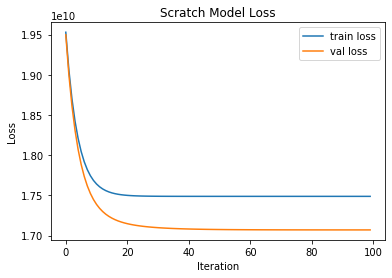

In [356]:
%matplotlib inline

plt.figure()

plt.plot(np.arange(len(scratch_lr.loss)), scratch_lr.loss, label='train loss')
plt.plot(np.arange(len(scratch_lr.loss)), scratch_lr.val_loss, label='val loss')
plt.title("Scratch Model Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.show()

## 【問題8】（アドバンス課題）バイアス項の除去
バイアス項$\theta_0$を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

>モデルのfitおよびpredict関数に下記コードを追記。学習を行う前段階にバイアスを含む場合と含まない場合のデータXの加工を指定。なお、predict関数にはパラメータ初期設定のコードは追加しない。

In [ ]:
# bias無しの場合はX_0を追加せずパラメータを作成
if self.no_bias:
    self.coef_ = np.random.rand(len(X[0]))  # fit関数にのみ追記（predictはpass）
# bias有りの場合はX_0 = 1をXにconcatし、パラメータを作成
else:
    bias = np.ones(len(X)).reshape(-1, 1)
    X = np.concatenate((bias, X), axis=1)
    self.coef_ = np.random.rand(len(X[0]))  # fit関数にのみ追記

In [310]:
# バイアスありの学習と推定
scr_lr_bias = ScratchLinearRegression(lr=0.1, num_iter=100, no_bias=False)

scr_lr_bias.fit(X_train_std, y_train, X_val=X_test_std, y_val=y_test)

scr_pred_bias = scr_lr_bias.predict(X_test_std)

scr_mse_bias = mse(scr_pred_bias, y_test)

print("BiasedスクラッチモデルのMSE：{:.3g}".format(scr_mse_bias))

BiasedスクラッチモデルのMSE：2.13e+09


>バイアスを加えたモデルは、sklearnの線形回帰モデルと同値のMSEとなった。

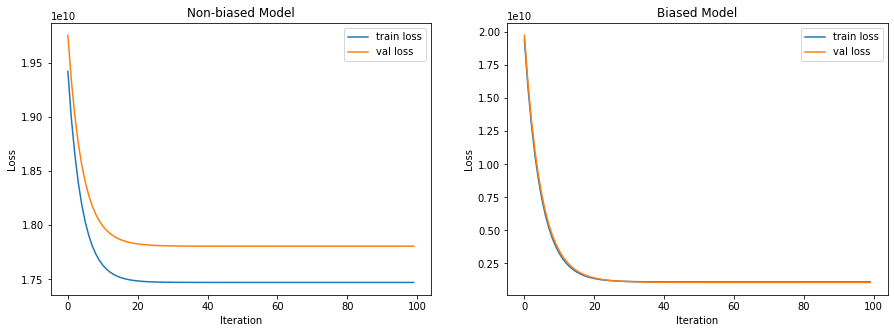

In [315]:
# バイアス有無の影響をグラフ化
%matplotlib inline


plt.figure(figsize=(15,5))

plt.subplot(121)

plt.plot(np.arange(len(scratch_lr.loss)), scratch_lr.loss, label='train loss')
plt.plot(np.arange(len(scratch_lr.val_loss)), scratch_lr.val_loss, label='val loss')
plt.title("Non-biased Model")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.subplot(122)

plt.plot(np.arange(len(scr_lr_bias.loss)), scr_lr_bias.loss, label='train loss')
plt.plot(np.arange(len(scr_lr_bias.val_loss)), scr_lr_bias.val_loss, label='val loss')
plt.title("Biased Model")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.show()

>バイアス有りの学習はバイアス無しと比べ、訓練・検証データともに収束した際の損失が低いことが分かる。また、両ケースとも約20回ほどで結果が収束したが、バイアス有りの方が訓練データと検証データの損失の差が低く、バイアス無しだと検証データの推定が訓練データより悪い結果となっている（＝過学習の可能性大）。これらの結果から考察するに、バイアスの役割はモデルの精度向上、並びに過学習の抑制に貢献していると考えられる。理由として、バイアスとはスカラーであり、線形モデルのy切片であるため、バイアス無しの場合は線形曲線が原点を必ず通過し、モデルの柔軟性が損なわれるためだろう。データの分布に関係なく必ず原点を通過するため、学習の際は半ば強引に訓練データにfitしなければならず、過学習に陥ってしまう。バイアスを加えることによりy切片が自由に動け、より汎化性の高いモデルが実装できる。

## 【問題9】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

>データを標準化してしまうと、特徴量の多次元化による影響が検証できないため、この課題は標準化せず学習を行う。

In [362]:
# 同じサンプルが多次元化されるように、分割後に多次元化する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X2_train = X_train**2
X2_test = X_test**2

X3_train = X_train**3
X3_test = X_test**3

In [376]:
# バイアスありの学習と推定
scr_lr = ScratchLinearRegression(lr=0.000000001, num_iter=100000, no_bias=False)

scr_lr.fit(X2_train, y_train, X_val=(X2_test), y_val=y_test)

scr_pred = scr_lr.predict(X2_test)

scr_mse = mse(scr_pred, y_test)

print("スクラッチモデルのMSE：{:.3g}".format(scr_mse))

/Users/tamiyagt/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: overflow encountered in square
/Users/tamiyagt/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in subtract


スクラッチモデルのMSE：nan


>特徴量を２乗、３乗と大きくするにつれて学習率を小さくし、iteration数を増やさなければ学習が収束しない（またはエラーとなる）。結果、線形回帰に対する特徴量の標準化の重要性を理解した。

## 【問題10】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$

以下の式から説明をはじめることができます。

$$
\theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) \\
$$

目的関数（損失関数）$J(\theta)$は次の式です。

$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2
$$

> 1. 目的関数の式の$h_\theta(x^{(i)})$は$\theta x^{(i)}$なので、これを代入
$$
J(\theta)=\frac{1 }{ 2m}  \sum_{i=1}^{m} (\theta x^{(i)}-y^{(i)})^2
$$
> 2. $J(\theta)$の$\theta_j$に対する偏微分を計算
$$
\frac{\partial}{\partial \theta_j}J(\theta)=\frac{2 }{ 2m} \frac{\partial}{\partial \theta_j} \sum_{i=1}^{m} (\theta x_{j}^{(i)}-y^{(i)})
$$
$$
=\frac{1 }{ m} \sum_{i=1}^{m} (\theta x_{j}^{(i)}-y^{(i)})x_{j}^{(i)}
$$
> 3. ２の偏微分を最急降下法の式に代入
$$
\theta_j := \theta_j - \frac{1 }{ m} \sum_{i=1}^{m} (\theta x_{j}^{(i)}-y^{(i)})x_{j}^{(i)}
$$
> 4. 最後に$h_\theta(x^{(i)})$を戻し、更新式の完成
$$
\theta_j := \theta_j - \frac{1 }{ m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})x_{j}^{(i)}
$$

## 【問題11】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

>線形回帰では目的関数に平均二乗誤差を用いるため、原則として最適解は一つである。平均二乗誤差は凸関数の曲線を描いており（下記参照）、各特徴量$\theta$において最小値は一つのみ観測される。そのため、重回帰分析のように多次元の$\theta$がある場合（＝特徴量が複数ある）も、目的関数は局所最適解の無い多次元空間の凸型曲線として描かれる。<br>
><br>
>ただし、線形回帰でも局所最適解が存在する例外が二つほどある。一つは学習モデルがunidentifiableの場合。すなわち、異なる$\theta$で同じ結果が観測されてしまう場合は局所最適解が存在する。二つ目は、パラメータの制限による複数解の存在である。パラメータが制限される状況下で最適解が制限範囲外であった場合、最適解は制限範囲の境界値に二つ存在する状況になる。（例：$|\theta|\ge1$の制限があり、最適解が$\theta=0$だとすると、制限下における最適解は$\theta=-1, 1$となる）<br>
>[参照 - stackexchange](https://stats.stackexchange.com/questions/144080/can-there-be-multiple-local-optimum-solutions-when-we-solve-a-linear-regression)

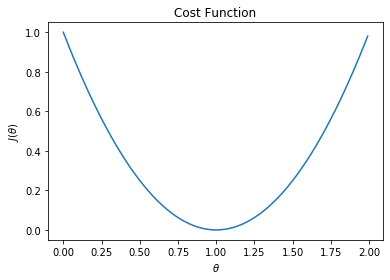

In [394]:
# 平均二乗誤差のグラフ化
theta = np.arange(0,2,0.01)
J_theta = (1-w)**2   # xとyに適当な数値を代入

plt.plot(theta, J_theta) 
plt.title("Cost Function")
plt.xlabel("$\\theta$")
plt.ylabel("$J(\\theta)$")

plt.show()